In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



## Cleaning Data Sets

In [3]:
#Filtering down columns for each of the 3 data sets as follows:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType,  
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
#Hazard Mitigation Grant Program Disaster Summaries - disasterNumber and obligatedTotalAmount

In [4]:
#Disaster Decloration Summaries - disasterNumber, state, declarationType, fyDeclared, incidentType  
disaster_sum = pd.read_csv('DisasterDeclarationsSummaries.csv')
disaster_sum_clean = disaster_sum[['disasterNumber', 'state', 'declarationType', 'fyDeclared', 'incidentType']]
#FEMA Disaster Declarations Summary is a summarized dataset describing all federally declared disasters, beginning with the first disaster declaration in 1953
#for more information: https://www.fema.gov/openfema-data-page/disaster-declarations-summaries-v2
disaster_sum_clean

,disasterNumber,state,declarationType,fyDeclared,incidentType
0,1,GA,DR,1953,Tornado
1,4,MI,DR,1953,Tornado
2,3,LA,DR,1953,Flood
3,6,MI,DR,1953,Tornado
4,2,TX,DR,1953,Tornado
...,...,...,...,...,...
59522,3533,FL,EM,2020,Hurricane
59523,3533,FL,EM,2020,Hurricane
59524,3533,FL,EM,2020,Hurricane
59525,3533,FL,EM,2020,Hurricane


In [5]:
#Hazard Mitigation Assistance Projects - disasterNumber, projectType, numberOfProperties, numberOfFinalProperties, projectAmount, federalShareObligated, benefitCostRatio, netValueBenefits
haz_project = pd.read_csv('HazardMitigationAssistanceProjects.csv')
haz_project_clean = haz_project[['disasterNumber', 'projectType', 'numberOfProperties', 'numberOfFinalProperties', 'projectAmount', 'federalShareObligated', 'benefitCostRatio', 'netValueBenefits', 'projectIdentifier']]
#The dataset contains funded projects (financial obligation to grantee) under the Hazard Mitigation Assistance (HMA) grant programs.
#For more information: https://www.fema.gov/openfema-data-page/hazard-mitigation-assistance-projects-v2
haz_project_clean

,disasterNumber,projectType,numberOfProperties,numberOfFinalProperties,projectAmount,federalShareObligated,benefitCostRatio,netValueBenefits,projectIdentifier
0,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,5,4,31477.0,20086.0,1.371,21420.0,DR-1971-0561-R
1,1971.0,206.1: Safe Room (Tornado and Severe Wind Shel...,4,4,19032.0,13650.0,1.371,21420.0,DR-1971-0428-R
2,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,0,769334.0,577000.0,4.460,3181553.0,DR-1971-0430-R
3,1971.0,601.1: Generators,0,0,42578.0,31934.0,0.000,0.0,DR-1971-0373-F
4,1971.0,206.2: Safe Room (Tornado and Severe Wind Shel...,1,1,143899.0,107924.0,3.097,500916.0,DR-1971-0672-R
...,...,...,...,...,...,...,...,...,...
29191,NaN,700.1: Management Costs - Salaries,0,0,15000.0,11250.0,0.000,NaN,FMA-MC-08-CO-2019-002
29192,4086.0,202.2: Elevation of Private Structures - Coastal,3,1,46263.0,34626.0,0.000,0.0,DR-4086-0647-R
29193,4339.0,601.1: Generators,0,0,59885761.0,2503000.0,5.830,349133987.0,DR-4339-0016-R
29194,NaN,200.1: Acquisition of Private Real Property (S...,4,4,1246648.3,1246648.3,1.060,1321757.0,FMA-PJ-06-TX-2018-014


In [6]:
#Hazard Mitigation Grant Program Disaster Summaries
hazard_sum = pd.read_csv('HazardMitigationGrantProgramDisasterSummaries.csv')
hazard_sum_clean = hazard_sum[['disasterNumber', 'obligatedTotalAmount','lockedInCeilingAmount']]
#The dataset contains disaster level financial information for FEMA's Hazard Mitigation Grant Program (HMGP)
#For more information: https://www.fema.gov/openfema-data-page/hazard-mitigation-grant-program-disaster-summaries
hazard_sum_clean

,disasterNumber,obligatedTotalAmount,lockedInCeilingAmount
0,1071,2834575.0,2756605.0
1,1337,782081.0,950900.0
2,1326,333150.0,314981.0
3,1506,1791043.0,2192856.0
4,1211,413384.0,437358.0
...,...,...,...
1731,4551,0.0,0.0
1732,4556,0.0,0.0
1733,4553,0.0,0.0
1734,4554,0.0,0.0


In [7]:
#Looking at an overview of disasters and the Hazard mitigation projects associated with them
disaster_projects = pd.merge(haz_project_clean, disaster_sum_clean, on='disasterNumber')
disaster_summary = disaster_projects.groupby(['state','incidentType', 'disasterNumber', 'projectIdentifier']).mean()
disaster_summary

numberOfProperties  \
state incidentType    disasterNumber projectIdentifier                       
AK    Coastal Storm   4244.0         DR-4244-0001-P                      0   
                                     DR-4244-0002-P                      0   
                                     DR-4244-0003-R                      0   
                                     DR-4244-0004-F                      0   
                                     DR-4244-0007-M                      0   
...                                                                    ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                      0   
                                     DR-4007-0009-R                      0   
                      4306.0         DR-4306-0003-M                      0   
                                     DR-4306-0004-R                      0   
      Tornado         1599.0         DR-1599-0001-P                      0   

                                                        numberOfFinalProperties  \
state incidentType    disasterNumber projectIdentifier                            
AK    Coastal Storm   4244.0         DR-4244-0001-P                           0   
                                     DR-4244-0002-P                           0   
                                     DR-4244-0003-R                           0   
                                     DR-4244-0004-F                           0   
                                     DR-4244-0007-M                           0   
...                                                                         ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                           0   
                                     DR-4007-0009-R                           0   
                      4306.0         DR-4306-0003-M                           0   
                                     DR-4306-0004-R                           0   
      Tornado         1599.0         DR-1599-0001-P                           0   

                                                        projectAmount  \
state incidentType    disasterNumber projectIdentifier                  
AK    Coastal Storm   4244.0         DR-4244-0001-P           22034.0   
                                     DR-4244-0002-P           25000.0   
                                     DR-4244-0003-R           74672.0   
                                     DR-4244-0004-F           15330.0   
                                     DR-4244-0007-M           28718.0   
...                                                               ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R         1217776.0   
                                     DR-4007-0009-R          151030.0   
                      4306.0         DR-4306-0003-M           17417.0   
                                     DR-4306-0004-R          127938.0   
      Tornado         1599.0         DR-1599-0001-P           22785.0   

                                                        federalShareObligated  \
state incidentType    disasterNumber projectIdentifier                          
AK    Coastal Storm   4244.0         DR-4244-0001-P                  16526.00   
                                     DR-4244-0002-P                  18750.00   
                                     DR-4244-0003-R                  56004.49   
                                     DR-4244-0004-F                  11498.00   
                                     DR-4244-0007-M                  28718.00   
...                                                                       ...   
WY    Severe Storm(s) 4007.0         DR-4007-0008-R                 608003.00   
                                     DR-4007-0009-R                 113273.00   
                      4306.0         DR-4306-0003-M                  17417.00   
                                     DR-4306-0004-R                  95953.50   
      Tornado         1599.0         DR

## Isolating Hurricane Data 

In [9]:
#From the disaster summary DF, isoloting rows with incidentType = 'Flood'
disaster_sum_clean.head()
hurricane = disaster_sum_clean['incidentType']=='Hurricane'
disaster_sum_hurricane = disaster_sum_clean[hurricane]
disaster_sum_hurricane = disaster_sum_hurricane.drop_duplicates()
disaster_sum_hurricane

,disasterNumber,state,declarationType,fyDeclared,incidentType
19,23,RI,DR,1954,Hurricane
21,22,MA,DR,1954,Hurricane
22,26,NY,DR,1955,Hurricane
23,24,ME,DR,1954,Hurricane
24,28,NC,DR,1955,Hurricane
...,...,...,...,...,...
59388,3529,HI,EM,2020,Hurricane
59392,3530,TX,EM,2020,Hurricane
59426,3531,VI,EM,2020,Hurricane
59429,3532,PR,EM,2020,Hurricane


### Calculate number of Hurricane disasters per state regardless of Hazard Mitigation Funding

In [10]:
#Group the Hurricane Disaster Summary DF by State and count 'disasterNumber'
disaster_hurricane_state = disaster_sum_hurricane.groupby('state').count()
disaster_hurricane_state = disaster_hurricane_state['disasterNumber']
print(disaster_hurricane_state)

state
AL    21
AR     2
AS     5
AZ     1
CA     1
CT    10
DC     6
DE     8
FL    45
GA    13
HI     6
IA     1
ID     1
IL     1
IN     1
KS     1
KY     1
LA    27
MA    10
MD     8
ME     5
MI     1
MN     1
MO     1
MS    17
MT     1
NC    30
NE     1
NH     7
NJ     9
NM     1
NV     1
NY    12
OH     2
OK     1
PA     8
PR    16
RI     9
SC    17
TN     1
TX    22
VA    16
VI    18
VT     2
WI     1
WV     5
Name: disasterNumber, dtype: int64


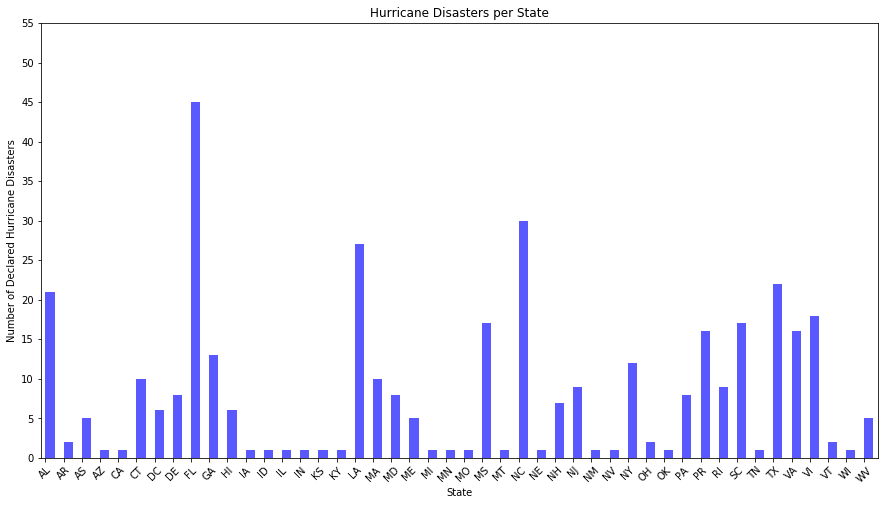

In [11]:
#Plotting the number of declared fire disasters per state
disaster_hurricane_state.plot(kind='bar', color='b', alpha=0.65, align="edge", figsize=(15,8), rot=45)
plt.xlabel("State")
plt.ylabel("Number of Declared Hurricane Disasters")
plt.title("Hurricane Disasters per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(0,60,5))
plt.show()

### Calculate Total Obligated Amount Per State for Hazard Mitigation

In [12]:
#merge the Flood Disaster Summary DF with the Hazard Summary DF to pull in financial data 
hurricane_state_funding = pd.merge(disaster_sum_hurricane, hazard_sum_clean, on='disasterNumber')
hurricane_state_funding

,disasterNumber,state,declarationType,fyDeclared,incidentType,obligatedTotalAmount,lockedInCeilingAmount
0,842,PR,DR,1989,Hurricane,5656728.0,5801211.0
1,841,VI,DR,1989,Hurricane,17476958.0,29456493.0
2,843,SC,DR,1989,Hurricane,11090956.0,10675000.0
3,844,NC,DR,1989,Hurricane,2032964.0,1938940.0
4,855,AS,DR,1990,Hurricane,2792331.0,2668032.0
...,...,...,...,...,...,...,...
165,4357,AS,DR,2018,Hurricane,733000.5,4201983.0
166,4458,LA,DR,2019,Hurricane,0.0,5213020.0
167,4464,SC,DR,2019,Hurricane,141016.0,6659600.0
168,4465,NC,DR,2020,Hurricane,0.0,10909218.0


In [19]:
#group the hurricane state funding DF by state and sum in order to calculate the total 'obligatedTotalAmount'
hurricane_state_funding_gr = hurricane_state_funding.groupby('state').sum()
hurricane_state_funding_OTA = hurricane_state_funding_gr['obligatedTotalAmount']
hurricane_state_funding_OTA

state
AL    1.219043e+08
AR    6.089540e+05
AS    9.217724e+06
CT    1.789467e+07
DC    1.701000e+05
DE    2.090743e+06
FL    8.650535e+08
GA    2.618685e+07
HI    3.861727e+06
LA    2.072860e+09
MA    6.960506e+06
MD    1.413917e+07
ME    7.938890e+05
MS    3.627005e+08
NC    2.714589e+08
NH    2.051028e+06
NJ    3.580088e+08
NY    9.723742e+08
OH    3.763547e+06
PA    2.499100e+07
PR    3.002974e+08
RI    2.603074e+06
SC    4.660344e+07
TX    7.716226e+08
VA    4.028952e+07
VI    1.408047e+08
VT    2.961373e+07
WV    2.253069e+06
Name: obligatedTotalAmount, dtype: float64

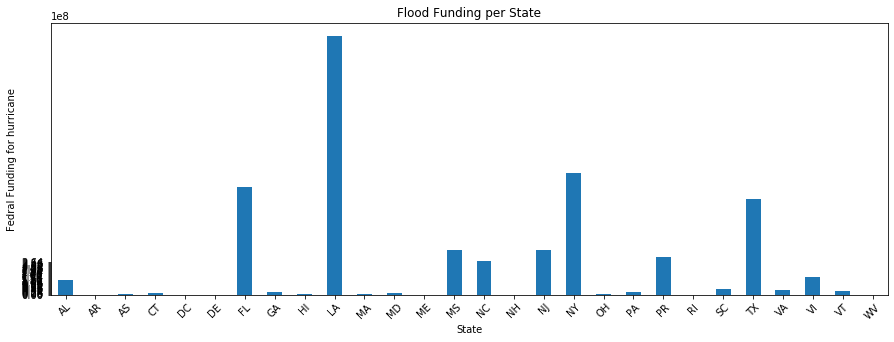

In [21]:
#Plot the amount of funding per state
hurricane_state_funding_OTA.plot(kind="bar", figsize=(15,5), rot=45)
# (x="state",y=['obligatedTotalAmount','lockedInCeilingAmount'],kind='bar', color='r', alpha=0.65, align="edge", figsize=(15,10), rot=45)
plt.xlabel("State")
plt.ylabel("Fedral Funding for hurricane")
plt.title("Flood Funding per State")
plt.xticks (rotation=45, ha='center')
plt.yticks(np.arange(1.305600e+04,2.646353e+08,8e+6))
plt.show()

### Funding Through the years for Louisiana

In [22]:
#Isolate LA's funding 
la = hurricane_state_funding['state']=='LA'
la_year_funding = hurricane_state_funding[la]
la_year_funding = la_year_funding.groupby('fyDeclared').sum()
la_year_funding[['obligatedTotalAmount','lockedInCeilingAmount']]

,obligatedTotalAmount,lockedInCeilingAmount
fyDeclared,,
1992,1.803168e+06,1.755246e+06
1998,7.197142e+06,7.046729e+06
2002,4.023296e+06,4.641295e+06
2003,1.992902e+07,2.985637e+07
2004,2.626940e+05,1.038692e+06
2005,1.752512e+09,1.860722e+09
2008,2.285490e+08,2.790854e+08
2012,5.789924e+07,6.697517e+07
2018,6.840790e+05,1.193906e+06


Text(0, 0.5, 'Federal Funding')

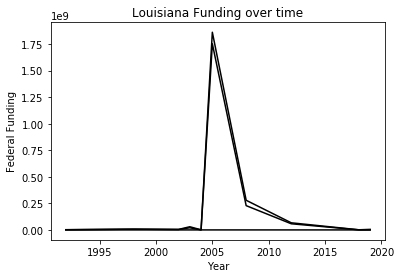

In [23]:
#plot LA's funding through the years 
la_funding_time = plt.plot(la_year_funding, color="black", label="Louisiana Funding over time")
plt.title("Louisiana Funding over time")
plt.xlabel("Year")
plt.ylabel("Federal Funding")

Pull in census data and run a scatter plot for correlation between population and funding $ - Run the persons correlation 